In [111]:
import re
import pandas as pd
import matplotlib.pyplot as plt


def startsWithDateAndTime(s):
    # regex pattern for date.(Works only for android. IOS Whatsapp export format is different. Will update the code soon
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9][0-9]), ([0-9]+):([0-9][0-9]) (AM|PM) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False
  
# Finds username of any given format.
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False
  
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
# Upload your file here
conversationPath = r'C:\Users\rahul\Downloads\chat.txt' # chat file
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
   
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])

In [112]:
df.head()

,Date,Time,Author,Message
0,2016-10-12,2:46 PM,None,"+91 96565 74326 created group ""👑Swargarajyam👑"""
1,2019-08-08,7:22 PM,None,Mani added you
2,2019-08-08,7:22 PM,Mani,Enta kanikane
3,2019-08-08,7:22 PM,Mani,Wait
4,2019-08-08,7:22 PM,Mani,Insta va


In [113]:
df.describe()

,Date,Time,Author,Message
count,20256,20256,19961,20256
unique,295,1169,11,14100
top,2020-09-22 00:00:00,10:31 PM,Mani,<Media omitted>
freq,1119,98,5620,3062
first,2016-10-12 00:00:00,NaN,NaN,NaN
last,2020-10-22 00:00:00,NaN,NaN,NaN


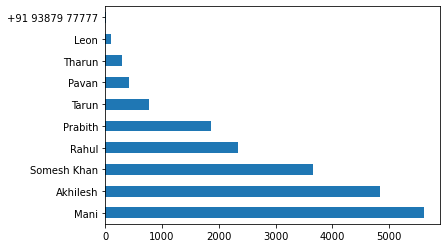

In [114]:
author_value_counts = df['Author'].value_counts() # Number of messages per author
top_10_author_value_counts = author_value_counts.head(10) # Number of messages per author for the top 10 most active authors
top_10_author_value_counts.plot.barh() 

In [115]:
null_authors_df = df[df['Author'].isnull()]
null_authors_df.head()

,Date,Time,Author,Message
0,2016-10-12,2:46 PM,None,"+91 96565 74326 created group ""👑Swargarajyam👑"""
1,2019-08-08,7:22 PM,None,Mani added you
231,2019-08-17,9:41 PM,None,Pranav ( Bengali? ): Hm
301,2019-08-18,8:32 AM,None,Pranav ( Bengali? ): Edaa ambani best business...
302,2019-08-18,8:32 AM,None,Pranav ( Bengali? ): Just think about this. An...


# Media sent by each author

         Date     Time    Author          Message
8  2019-08-09  5:46 PM  Akhilesh  <Media omitted>
27 2019-08-09  8:11 PM  Akhilesh  <Media omitted>
28 2019-08-09  8:13 PM  Akhilesh  <Media omitted>
57 2019-08-10  7:46 AM  Akhilesh  <Media omitted>
61 2019-08-10  8:07 AM  Akhilesh  <Media omitted>


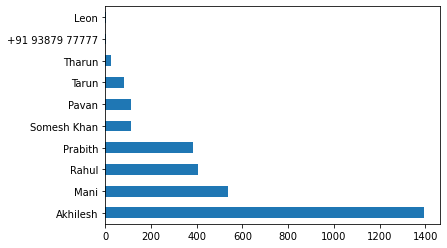

In [116]:
media_messages_df = df[df['Message'] == '<Media omitted>']
print(media_messages_df.head())

author_media_messages_value_counts = media_messages_df['Author'].value_counts()
top_10_author_media_messages_value_counts = author_media_messages_value_counts.head(10)
top_10_author_media_messages_value_counts.plot.barh()

In [117]:
messages_df = df.drop(null_authors_df.index) 
messages_df = messages_df.drop(media_messages_df.index)
messages_df.head()

,Date,Time,Author,Message
2,2019-08-08,7:22 PM,Mani,Enta kanikane
3,2019-08-08,7:22 PM,Mani,Wait
4,2019-08-08,7:22 PM,Mani,Insta va
5,2019-08-08,7:22 PM,Mani,Vere phone ind
6,2019-08-08,7:22 PM,Mani,Atil insta inf


In [118]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' '))).describe
messages_df.head()


,Date,Time,Author,Message,Letter_Count,Word_Count
2,2019-08-08,7:22 PM,Mani,Enta kanikane,13,<bound method NDFrame.describe of 2 2\n...
3,2019-08-08,7:22 PM,Mani,Wait,4,<bound method NDFrame.describe of 2 2\n...
4,2019-08-08,7:22 PM,Mani,Insta va,8,<bound method NDFrame.describe of 2 2\n...
5,2019-08-08,7:22 PM,Mani,Vere phone ind,14,<bound method NDFrame.describe of 2 2\n...
6,2019-08-08,7:22 PM,Mani,Atil insta inf,14,<bound method NDFrame.describe of 2 2\n...


In [119]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))

# Data augmentation

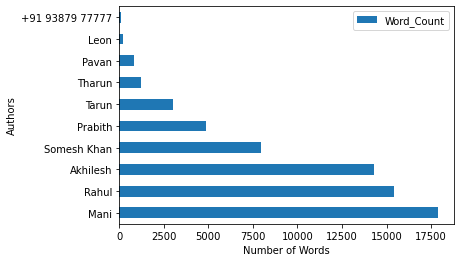

In [120]:
total_word_count_grouped_by_author = messages_df[['Author', 'Word_Count']].groupby('Author').sum()
sorted_total_word_count_grouped_by_author = total_word_count_grouped_by_author.sort_values('Word_Count', ascending=False)
top_10_sorted_total_word_count_grouped_by_author = sorted_total_word_count_grouped_by_author.head(10)
top_10_sorted_total_word_count_grouped_by_author.plot.barh()
plt.xlabel('Number of Words')
plt.ylabel('Authors')
plt.show()

Text(0, 0.5, 'Frequency')

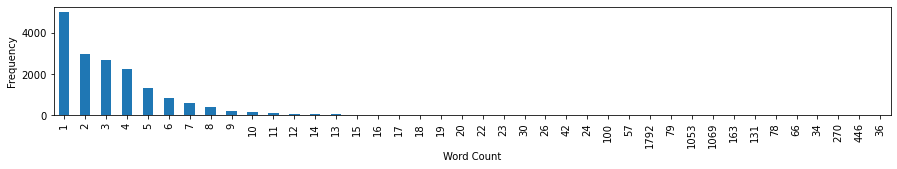

In [121]:
plt.figure(figsize=(15, 2)) # To ensure that the bar plot fits in the output cell of a Jupyter notebook
word_count_value_counts = messages_df['Word_Count'].value_counts()
top_40_word_count_value_counts = word_count_value_counts.head(40)
top_40_word_count_value_counts.plot.bar()
plt.xlabel('Word Count')
plt.ylabel('Frequency')

Text(0, 0.5, 'Authors')

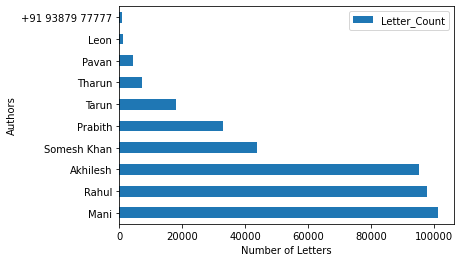

In [122]:
total_letter_count_grouped_by_author = messages_df[['Author', 'Letter_Count']].groupby('Author').sum()
sorted_total_letter_count_grouped_by_author = total_letter_count_grouped_by_author.sort_values('Letter_Count', ascending=False)
top_10_sorted_total_letter_count_grouped_by_author = sorted_total_letter_count_grouped_by_author.head(10)
top_10_sorted_total_letter_count_grouped_by_author.plot.barh()
plt.xlabel('Number of Letters')
plt.ylabel('Authors')

Text(0, 0.5, 'Date')

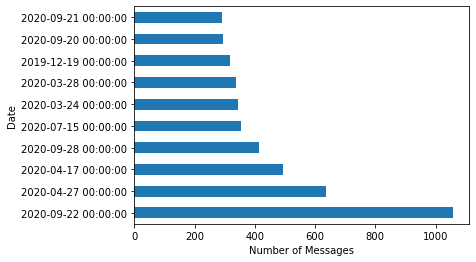

In [123]:
messages_df['Date'].value_counts().head(10).plot.barh() # Top 10 Dates on which the most number of messages were sent
plt.xlabel('Number of Messages')
plt.ylabel('Date')

Text(0, 0.5, 'Time')

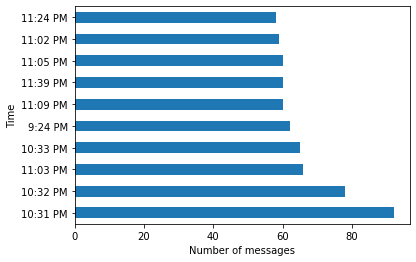

In [124]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

In [125]:
messages_df['Hour'] = messages_df['Time'].apply(lambda x : x.split(':')[0]) # The first token of a value in the Time Column contains the hour (Eg., "20" in "20:15")

Text(0, 0.5, 'Hour of Day')

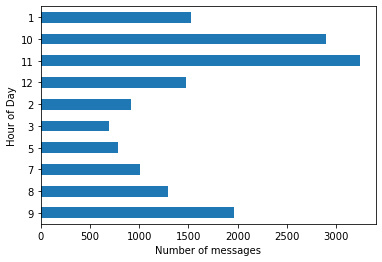

In [126]:
messages_df['Hour'].value_counts().head(10).sort_index(ascending=False).plot.barh() # Top 10 Hours of the day during which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Hour of Day')